In [3]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

In [13]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

url = "https://apps.foldingathome.org/teamstats/team197.html"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')

In [15]:
table = soup.find_all("table", class_="members")[0]

<table class="members">
 <tr>
  <th>
   Rank
  </th>
  <th>
   Team Rank
  </th>
  <th>
   Name
  </th>
  <th>
   Credit
  </th>
  <th>
   WUs
  </th>
 </tr>
 <tr>
  <td>
   23311
  </td>
  <td>
   1
  </td>
  <td>
   jayare
  </td>
  <td>
   33319163
  </td>
  <td>
   661
  </td>
 </tr>
 <tr>
  <td>
   24900
  </td>
  <td>
   2
  </td>
  <td>
   Alvin_Lee
  </td>
  <td>
   31047268
  </td>
  <td>
   396
  </td>
 </tr>
 <tr>
  <td>
   36072
  </td>
  <td>
   3
  </td>
  <td>
   spaiduhz
  </td>
  <td>
   20483275
  </td>
  <td>
   2085
  </td>
 </tr>
 <tr>
  <td>
   38575
  </td>
  <td>
   4
  </td>
  <td>
   EonStrife
  </td>
  <td>
   18888629
  </td>
  <td>
   585
  </td>
 </tr>
 <tr>
  <td>
   42649
  </td>
  <td>
   5
  </td>
  <td>
   Sidney_Koh
  </td>
  <td>
   16672025
  </td>
  <td>
   4304
  </td>
 </tr>
 <tr>
  <td>
   45004
  </td>
  <td>
   6
  </td>
  <td>
   KB
  </td>
  <td>
   15588167
  </td>
  <td>
   426
  </td>
 </tr>
 <tr>
  <td>
   46901
  </td>
  <td>
   7
  </

In [19]:
output_rows = []
for table_row in table.findAll('tr'):
    headers = table_row.findAll('th')
    if len(headers) != 0:
        header_row = []
        for header in headers:
            header_row.append(header.text)
        output_rows.append(header_row)
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)
    
with open('output.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(output_rows)

In [20]:
data = pd.read_csv('output.csv')
data.dropna(axis=0, how='all', inplace=True)
data

,Rank,Team Rank,Name,Credit,WUs
0,23311,1,jayare,33319163,661
1,24900,2,Alvin_Lee,31047268,396
2,36072,3,spaiduhz,20483275,2085
3,38575,4,EonStrife,18888629,585
4,42649,5,Sidney_Koh,16672025,4304
...,...,...,...,...,...
213,2364913,214,YxY,26,4
214,2374021,215,Joel,21,12
215,2404245,216,kengbeng,10,2
216,2428673,217,Tomato,4,3


In [21]:
first20 = data.head(20)
first20

,Rank,Team Rank,Name,Credit,WUs
0,23311,1,jayare,33319163,661
1,24900,2,Alvin_Lee,31047268,396
2,36072,3,spaiduhz,20483275,2085
3,38575,4,EonStrife,18888629,585
4,42649,5,Sidney_Koh,16672025,4304
5,45004,6,KB,15588167,426
6,46901,7,binayak,14809292,1013
7,57840,8,Mu:3,11174804,317
8,59266,9,ToeBlister,10822106,180
9,64948,10,Wolve34,9562923,172


In [22]:
import plotly.express as px

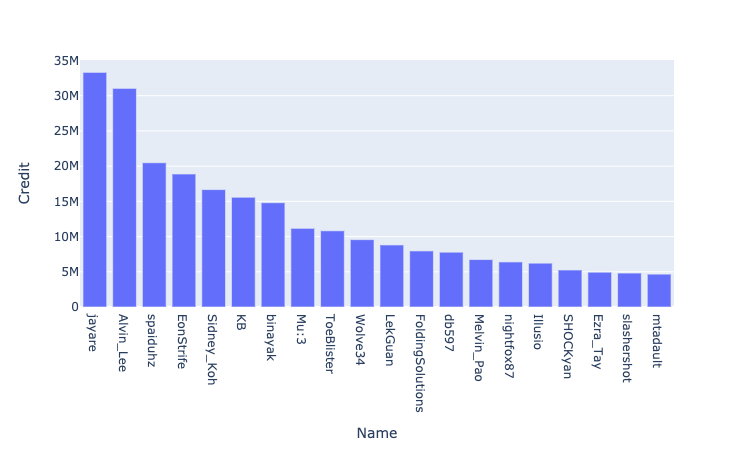

In [29]:
fig = px.bar(first20, x=first20['Name'], y=first20['Credit'])
fig.show()